# Chains in Langchain
In Langchain, Chains are powerful, reusable components that can be linked together to perform complex tasks.

Chains are invaluable due to their capacity to effortlessly blend diverse components, shaping a singular and coherent application. Through the creation of chains, multiple elements can seamlessly come together. Imagine this scenario: a chain is crafted to take in user input, polish it using a PromptTemplate, and subsequently pass on this refined response to a large language model (LLM). This streamlined process not only simplifies but also enriches the overall functionality of the system.


**Let’s summarize this:**

- Integrating prompt templates with LLMs allows for a powerful synergy.
- By taking the output of one LLM and using it as input for the next, it becomes feasible to connect multiple LLMs in a sequential fashion.

 
- Blending LLMs with external data enables the system to respond to inquiries effectively.
- Integrating LLMs with long-term memory, such as chat history, enhances the overall context and depth of interactions.

**Chains can be formed using various types of components, such as:**

- Prompts
- Models
- Arbitrary functions
> Chains provide us with the ability to build complex applications by linking multiple chains together or by incorporating chains with other vital elements. This approach enables a sophisticated and nuanced method for developing applications, allowing for intricate and advanced functionalities.

##### Types of Chain

There are many different Chains in Langchain that we can use. Here, we are going through three of the fundamental chain.

1. **LLM Chain**

> The most common chain. Takes an input, formats it, and passes it to an LLM for processing. Basic components are PromptTemplate, an LLM, and an optional output parser.

 .

2. **Sequential Chain**

> A series of Chains executed in a specific order. There are different variations, including:

- SimpleSequentialChain – singular input/output with output of one step as input to the next
- SequentialChain – allows for multiple inputs/outputs.

3. **Router Chain**

> The Router Chain is used for complicated tasks. If we have multiple subchains, each of which is specialized for a particular type of input, we could have a router chain that decides which subchain to pass the input to.

4. **Index Chains**

> These combine your data stored in indexes with LLMs. Useful for question answering over your own documents.

## Prompt Template
A Prompt Template is not just a static question or instruction, but rather a dynamic and adaptable way to generate a prompt for the LLM.

It’s a string that takes multiple inputs and generate a structured prompt tailored for those inputs.

Prompt Templates may also contain specific instructions for the LLM, a set of “few-shot” examples to help guide the LLM’s response, and possibly a direct question to be answered by the LLM.

Prompt Templates simplify the process of managing complex or varied inputs, and can make your code cleaner and more maintainable.

## LLM Chain – The simplest chain

The most basic form of chain within this system is the LLMChain, widely recognized and fundamental. Its operation involves a structured arrangement, including a PromptTemplate, an OpenAI model (either a Large Language Model or a ChatModel), and an optional output parser. Within this setup, the LLMChain accepts various input parameters. It employs the PromptTemplate to transform these inputs into a coherent prompt. This polished prompt is then inputted into the model. After receiving the output, the LLMChain uses the OutputParser, if provided, to further refine and format the result into its ultimate usable form. To illustrate the functionality of LLM chains, consider the concrete example.A concrete example illustrating the functionality of LLM chains is detailed below:

- It works by taking a user’s input and passing it to the first element in the chain — a PromptTemplate — to format the input into a particular prompt.

- The formatted prompt is then passed to the next (and final) element in the chain — a LLM.

In [28]:
# Import Necessary Libraries
import langchain
import openai
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate

from getpass import getpass
OPENAI_API_KEY = getpass()

 ········


##### Initialize LLM and Prompt Template
We initialize the OpenAI Large Language Model with specific parameters, including a temperature of 0.9, which affects the diversity of generated responses. Furthermore, users must define a ‘PromptTemplate’ to input a variable (in this case, “product”) and create a standardized prompt structure. At runtime, the placeholder ‘{product}’ can be dynamically populated with different product names.

In [29]:
llm = OpenAI(temperature=0.9,
          openai_api_key=OPENAI_API_KEY
       )

prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

##### Creating A Chain
We create an instance of the ‘LLMChain’ class, using a predefined OpenAI Large Language Model and a specified prompt template. Now, we have the capability to apply the chain to a product such as a “gaming laptop” using the chain.run command. This means the chain can dynamically process and generate responses tailored to this specific product input.

In [30]:
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt, verbose=True)

print(chain.run("gaming laptop"))

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Prompt after formatting:
What is a good name for a company that makes gaming laptop?

> Finished chain.


"Apex Gaming Co." or "VanguardTech Gaming"


- Based on this we get the name of a company called **GamingRX Systems**

### Sequential Chain
A sequential chain is a chain that combines various individual chains, where the output of one chain serves as the input for the next in a continuous sequence. It operates by running a series of chains consecutively.

There are two types of sequential chains:

**Simple Sequential Chain**: which handles a single input and output.

**Sequential Chain**: manage multiple inputs and outputs simultaneously.

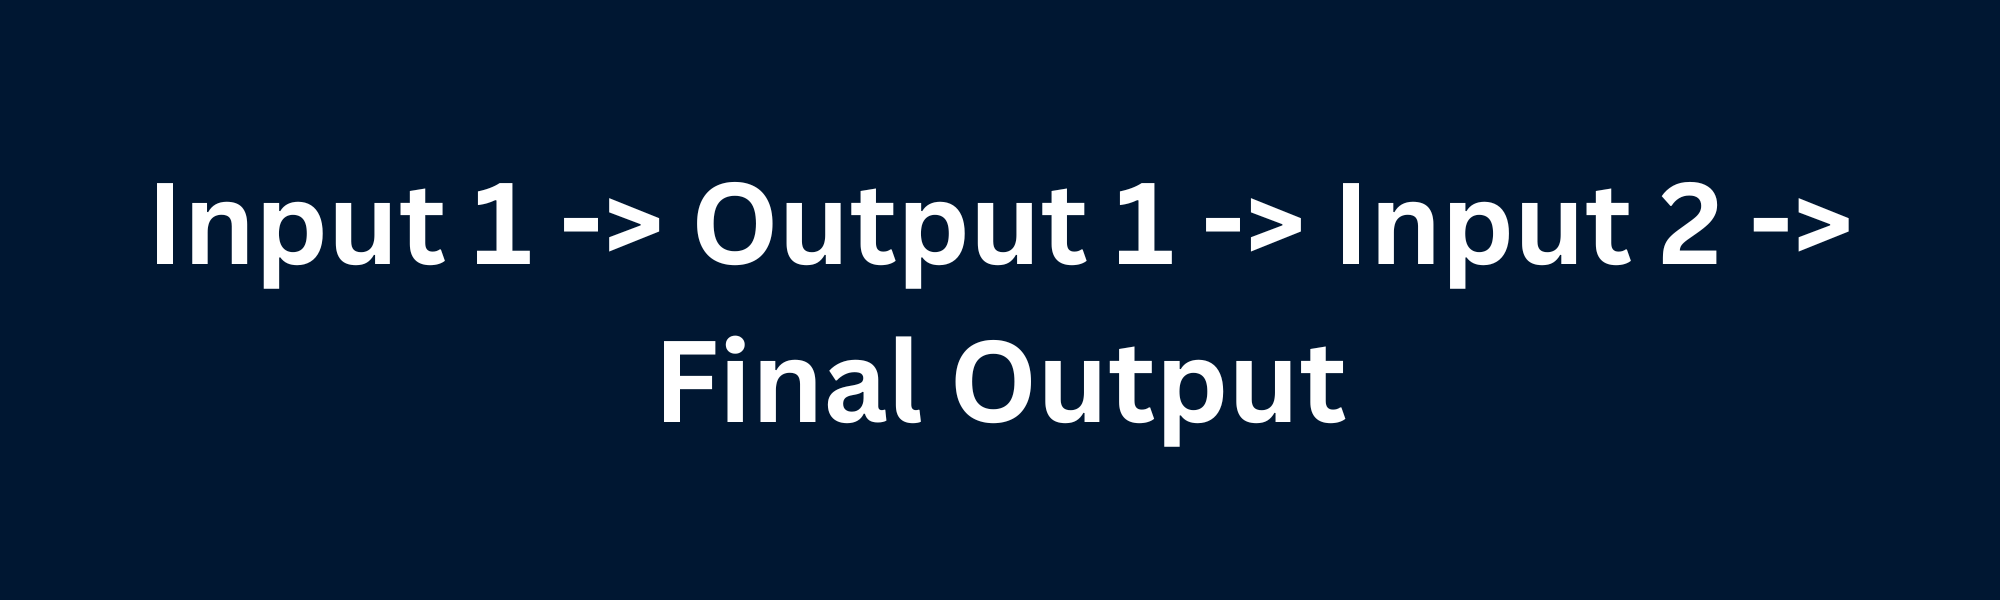

- A sequential chain merges various chains by using the output of one chain as the input for the next.

- It operates by executing a series of chains consecutively.

- This approach is valuable when you need to utilize the result of one operation as the starting point for the next one, creating a seamless flow of processes.

## Simple Sequential Chain
Sequential chains, in their simplest form, consist of steps where each step takes one input and produces one output. The output from one step becomes the input for the next.

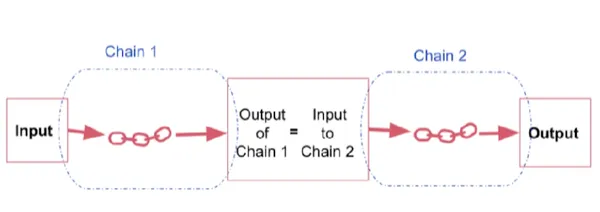

This straightforward approach is effective when dealing with sub-chains designed for singular inputs and outputs. It ensures a smooth and continuous flow of information, with each step seamlessly passing its output to the subsequent step.



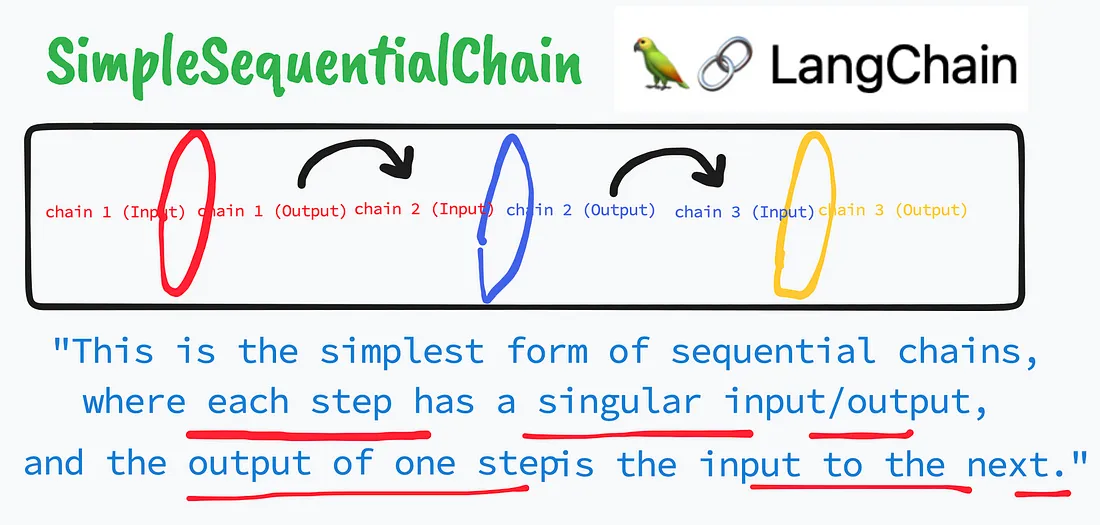

#### Crafting Chains – Simple Sequential Chains

Simple Sequential Chains allow for a single input to undergo a series of coherent transformations, resulting in a refined output. This sequential approach ensures systematic and efficient handling of data, making it ideal for scenarios where a linear flow of information processing is essential

In [4]:
# Importing Necessary Libraries
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain.chains import SimpleSequentialChain

#### Initializing and Chaining
We initialize an OpenAI Large Language Model with a temperature setting of 0.7 and an API key. Then, we create a specific chat prompt template with a placeholder for a product name. Subsequently, we form an LLMChain, which allows the generation of responses based on the provided prompt. We repeat this process for two different chains.

In [31]:
# This is a LLMChain to write first chain.

llm = OpenAI(temperature=0.7, 
             openai_api_key=OPENAI_API_KEY
            )

first_prompt = ChatPromptTemplate.from_template(
    "What is the best name to describe a company that makes {product}?"
)
chain_one = LLMChain(llm=llm, prompt=first_prompt)

In [32]:
# This is a LLMChain to write second chain.

llm = OpenAI(temperature=0.7, 
             openai_api_key=OPENAI_API_KEY
            )

second_prompt = ChatPromptTemplate.from_template(
    "Write a 20 words description for the following company:{company_name}"
)
chain_two = LLMChain(llm=llm, prompt=second_prompt)

#### Chaining Two Chains

Create an overall Simple Sequential Chain, comprising two different individual chains, chain_one, and chain_two. Execute this with the input “gaming laptop,” it sequentially processes the input through the defined chains and provides an output, that demonstrates the step-by-step sequential execution of the chains.

In [33]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],
                                             verbose=True
                                            )
overall_simple_chain.run("gaming laptop")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")




"EliteTech Gaming"


"EliteTech Gaming is a cutting-edge gaming company, offering top-of-the-line technology and superior gaming experiences for players of all levels." 

> Finished chain.


'\n\n"EliteTech Gaming is a cutting-edge gaming company, offering top-of-the-line technology and superior gaming experiences for players of all levels." '

## Sequential Chain

Not all of the sequential chains operate with a single string input and output. In more intricate setups, these chains handle multiple inputs and generate multiple final outputs. The careful naming of input and output variables holds important significance in these complex chains.

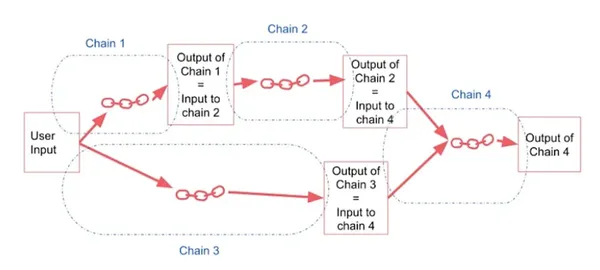

A more general form of sequential chains allows for multiple inputs/outputs. Any step in the chain can take in multiple inputs.



### Crafting Chains – Sequential Chains

In [34]:
#Importing Necessary Libraries

from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.prompts import ChatPromptTemplate
from langchain.chains import SequentialChain

llm = OpenAI(temperature=0.7, 
             openai_api_key=OPENAI_API_KEY
            )


#### Initializing and Chaining

We define a prompt template, instructing the system to perform a specific task. We then create a corresponding LLMChain, using the designated Large Language Model (LLM) and the defined prompt template. The chain is set up to take the input, pass it through the LLM, and generate the output. We repeat this process to establish four distinct chains.

In [35]:
Review = """Les ordinateurs portables GamersTech impressionne par ses
 performances exceptionnelles et son design élégant. De sa configuration 
 matérielle robuste à un clavier RVB personnalisable et un système de 
 refroidissement efficace, il établit un équilibre parfait entre prouesses 
 de jeu et portabilité."""

# prompt template 1: translate to English

first_prompt = ChatPromptTemplate.from_template(
    "Translate the following review to english:"
    "\n\n{Review}"
)

# chain 1: input= Review and output= English_Review

chain_one = LLMChain(llm=llm, prompt=first_prompt,
                     output_key="English_Review"                     
                    )

In [36]:
# prompt template 2: Summarize the English review

second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)

# chain 2: input= English_Review and output= summary

chain_two = LLMChain(llm=llm, prompt=second_prompt,
                     output_key="summary"
                    )

In [37]:
# prompt template 3: translate to English

third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)

# chain 3: input= Review and output= language

chain_three = LLMChain(llm=llm, prompt=third_prompt,
                       output_key="language"
                      )

In [38]:
# prompt template 4: follow up message

fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)

# chain 4: input= summary, language and output= followup_message

chain_four = LLMChain(llm=llm, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

#### Chaining Two Chains

An overall Sequential Chain named ‘overall_chain’ is created, incorporating four individual chains ‘chain_one’, ‘chain_two’, ‘chain_three’, and ‘chain_four’. The input variable “Review” is processed through these chains, generating three distinct output variables: “English_Review,” “summary,” and “followup_message.” The ‘overall_chain’ executes the input review through the specified chains and produces these outputs, facilitating a structured, sequential processing flow with detailed outputs.

In [39]:
overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)
overall_chain(Review)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



> Finished chain.


{'Review': 'Les ordinateurs portables GamersTech impressionne par ses\n performances exceptionnelles et son design élégant. De sa configuration \n matérielle robuste à un clavier RVB personnalisable et un système de \n refroidissement efficace, il établit un équilibre parfait entre prouesses \n de jeu et portabilité.',
 'English_Review': '\n\nGamersTech laptops impress with their exceptional performance and elegant design. From its robust hardware configuration to a customizable RGB keyboard and efficient cooling system, it strikes the perfect balance between gaming prowess and portability.',
 'summary': '\n\nGamersTech laptops offer impressive performance and sleek design, with powerful hardware, customizable features, and effective cooling for a perfect balance between gaming and portability.',
 'followup_message': '\n\nRéponse :\n\nLes ordinateurs portables GamersTech offrent des performances impressionnantes et un design élégant, avec du matériel puissant, des fonctionnalités perso

## Router Chain
The Router Chain is used for complicated tasks. If we have multiple subchains, each of which is specialized for a particular type of input, we could have a router chain that decides which subchain to pass the input to.

It consists of:

- **Router Chain:** It is responsible for selecting the next chain to call.
- **Destination Chains:** Chains that the router chain can route to.
- **Default chain:** Used when the router can’t decide which subchain to use.

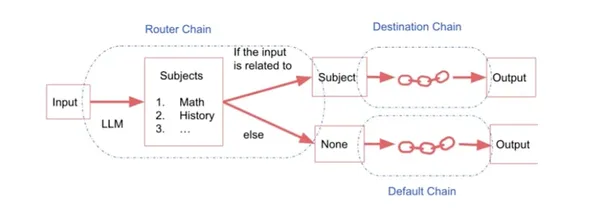

This involves directing an input toward a specific chain based on what exactly that input is. When there are several subchains, each tailored for distinct input types, a router chain comes into play. This router chain acts as a decision-maker, determining which specialized subchain to send the input to. Essentially, it enables the seamless routing of inputs to the appropriate subchains, ensuring efficient and precise processing based on the input’s specific characteristics.

### Crafting Chains – Router Chain

In [40]:
# Importing Necessary Libraries
from langchain.chains.router import MultiPromptChain
from langchain.chains.router.llm_router import LLMRouterChain,RouterOutputParser
from langchain.prompts import PromptTemplate

llm = OpenAI(temperature=0.7, openai_api_key=OPENAI_API_KEY)

### Defining Prompt Templates

Let’s consider a scenario where we need to direct inputs to specialized chains based on subjects such as Maths, Physics, History, or Computer Science. To accomplish this, we create distinct prompts for each subject: one for physics questions, another for math queries, a third for history inquiries, and a fourth for computer science-related matters. We meticulously design these prompts to cater to the unique needs of each subject area.

In [41]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


Furthermore, detailed information, including names and descriptions, can be attached to these prompt templates. This additional context provides a comprehensive understanding of each template’s purpose. This information is then supplied to the router chain. The router chain then determines which subchain to route to based on the specific subject, ensuring that the appropriate prompt template is utilized for precise and effective responses.

In [42]:
# Defining the prompt templates
prompt_infos = [
    {
        "name": "physics",
        "description": "Good for answering questions about physics",
        "prompt_template": physics_template
    },
    {
        "name": "math",
        "description": "Good for answering math questions",
        "prompt_template": math_template
    },
    {
        "name": "History",
        "description": "Good for answering history questions",
        "prompt_template": history_template
    }
]

### Creating Destination Chains

Next, our focus shifts to crafting destination chains. These chains are activated by the RouterChain, functioning as individual language model chains, specifically LLM chains. Additionally, a default chain is outlined to handle situations where the router encounters ambiguity and cannot determine the suitable subchain to utilize. This default chain acts as a fallback option, ensuring a response even in cases of indecision.

In [43]:
destination_chains = {}
for p_info in prompt_infos:
    name = p_info["name"]
    prompt_template = p_info["prompt_template"]
    prompt = ChatPromptTemplate.from_template(template=prompt_template)
    
    chain = LLMChain(llm=llm, prompt=prompt)
    destination_chains[name] = chain

destinations = [f"{p['name']}: {p['description']}" for p in prompt_infos]
destinations_str = "\n".join(destinations)

#### Creating a Multi-prompt Router Template

We establish a template guiding the LLM in directing interactions between various chains. This template not only outlines the specific task instructions but also dictates the precise format that the output should adhere to, ensuring a standardized and consistent response mechanism.

In [44]:
MULTI_PROMPT_ROUTER_TEMPLATE = """Given a raw text input to a \
language model select the model prompt best suited for the input. \
You will be given the names of the available prompts and a \
description of what the prompt is best suited for. \
You may also revise the original input if you think that revising\
it will ultimately lead to a better response from the language model.

<< FORMATTING >>
Return a markdown code snippet with a JSON object formatted to look like:
```json
{{{{
    "destination": string \ name of the prompt to use or "DEFAULT"
    "next_inputs": string \ a potentially modified version of the original input
}}}}
```

REMEMBER: "destination" MUST be one of the candidate prompt \
names specified below OR it can be "DEFAULT" if the input is not\
well suited for any of the candidate prompts.
REMEMBER: "next_inputs" can just be the original input \
if you don't think any modifications are needed.

<< CANDIDATE PROMPTS >>
{destinations}

<< INPUT >>
{{input}}

<< OUTPUT (remember to include the ```json)>>"""

#### Creating a Default Chain

A preset prompt template is established to accommodate all types of input text. An associated LLMChain, named ‘default_chain,’ is then crafted using the designated Large Language Model and the predefined prompt. This setup enables the Large Language Model to generate responses based on any provided input text.

In [45]:
default_prompt = ChatPromptTemplate.from_template("{input}")

default_chain = LLMChain(llm=llm, prompt=default_prompt)

In [46]:
default_prompt

ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])

In [47]:
default_chain

LLMChain(verbose=False, prompt=ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]), llm=OpenAI(client=<openai.resources.completions.Completions object at 0x000001FB410F74F0>, async_client=<openai.resources.completions.AsyncCompletions object at 0x000001FB41118640>, model_kwargs={}, openai_api_key='sk-PEyVjpVdgQLnp5lHRPa0_yLk9ywTPeOKMTWHgfw5h8T3BlbkFJU6szIJ68QrMP3lqrKghoKK0lGbR4HL9Kd4HleQpF8A', openai_proxy='', logit_bias={}), output_parser=StrOutputParser(), llm_kwargs={})

#### Creating Router Template
Moving forward, a flexible router template is developed, encompassing a range of categories such as Physics, Math, History, and Computer Science. From this template, a distinct prompt template tailored for the router is created. Utilizing this customized template, a router chain is established, employing the Large Language Model and the corresponding router prompt.

To improve decision-making capabilities, a router output parser is introduced. This parser assists the router chain in efficiently navigating between subchains. This comprehensive arrangement ensures that inputs are directed precisely to specific subchains, leading to accurate and targeted responses across various destination categories.

In [48]:
router_template = MULTI_PROMPT_ROUTER_TEMPLATE.format(
    destinations=destinations_str
)
router_prompt = PromptTemplate(
    template=router_template,
    input_variables=["input"],
    output_parser=RouterOutputParser(),
)

router_chain = LLMRouterChain.from_llm(llm, router_prompt)


#### Chaining Everything Together
A MultiPromptChain is created, incorporating a router chain to intelligently route inputs to specific destination chains. Additionally, a default chain is included to handle cases where the router chain may encounter ambiguity, ensuring a structured and effective processing flow with verbose logging enabled for detailed insights.

In [49]:
chain = MultiPromptChain(router_chain=router_chain,
                         destination_chains=destination_chains,
                         default_chain=default_chain, verbose=True
                        )

In [50]:
chain

MultiPromptChain(verbose=True, router_chain=LLMRouterChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['input'], input_types={}, output_parser=RouterOutputParser(), partial_variables={}, template='Given a raw text input to a language model select the model prompt best suited for the input. You will be given the names of the available prompts and a description of what the prompt is best suited for. You may also revise the original input if you think that revisingit will ultimately lead to a better response from the language model.\n\n<< FORMATTING >>\nReturn a markdown code snippet with a JSON object formatted to look like:\n```json\n{{\n    "destination": string \\ name of the prompt to use or "DEFAULT"\n    "next_inputs": string \\ a potentially modified version of the original input\n}}\n```\n\nREMEMBER: "destination" MUST be one of the candidate prompt names specified below OR it can be "DEFAULT" if the input is notwell suited for any of t

In [51]:
chain.run("what is your name")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


None: {'input': 'what is your name'}
> Finished chain.


'\n\nI am an AI digital assistant designed and created by a team of developers at OpenAI. I do not have a name as I am not a physical being. You can simply refer to me as OpenAI. How can I assist you?'

In [52]:
chain.run("what is radiation?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


physics: {'input': 'what is radiation?'}
> Finished chain.


'\n\nRadiation is the emission or transmission of energy in the form of waves or particles through space or a material medium. It can be classified into several types, including electromagnetic radiation (such as light and radio waves), particle radiation (such as alpha and beta particles), and nuclear radiation (such as gamma rays). Radiation can be natural, such as from the sun or radioactive elements, or man-made, such as from X-rays or nuclear power plants. It can have both harmful and beneficial effects on living organisms and is an important concept in the field of physics.'

In [29]:
chain.run("what is radiation?")



> Entering new MultiPromptChain chain...


C:\Application\anaconda\envs\python_new\lib\site-packages\langchain\chains\llm.py:280: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


physics: {'input': 'What is radiation?'}
> Finished chain.


'\n\nAnswer: Radiation is the energy that is transmitted in the form of electromagnetic waves or particles. It can be either naturally occurring or artificially produced, and can be in the form of visible light, infrared or ultraviolet light, x-rays, gamma rays, alpha or beta particles. Radiation can also be used to transfer heat or to provide power for medical, industrial, and scientific applications.'

In [53]:
chain.run("what is 2 + 8 + 18?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


math: {'input': 'what is 2 + 8 + 18?'}
> Finished chain.


'\n\nThe answer is 28.'

In [54]:
chain.run("what is 2 + 8 + 18 / 6 + 32?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


math: {'input': 'what is 2 + 8 + 18 / 6 + 32?'}
> Finished chain.


'\n\nThe answer is 44.'